In [6]:
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
pd.options.display.max_columns = 70
sns.set_style("whitegrid")
% matplotlib inline

In [7]:
! cat ./ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

### READMEに従ってDataFrameを作成

In [61]:
# ユーザーとmovieのratingのDataFrame
names = ["user_id", "movie_id", "rating", "timestamp"]
u_data = pd.read_csv("ml-100k/u.data", delimiter='\t', header=None, names=names)

# movieと特徴(カテゴリとか公開日)のDataFrame
names = [
    "movie_id","movie_title","release_date","video_release_date",
    "IMDb_URL","unknown","Action","Adventure","Animation",
    "Children's","Comedy","Crime","Documentary","Drama","Fantasy",
    "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
    "Thriller","War","Western"
]
u_item = pd.read_csv("ml-100k/u.item", delimiter='|', header=None, names=names, encoding="ISO-8859-1")

# ユーザーの特徴のDataFrame
names = ["user_id", "age", "gender", "occupation", "zip_code"]
u_user = pd.read_csv("ml-100k/u.user", delimiter="|", header=None, names=names)

### 個々のユーザーが何回ratingしているか調べてみる

In [82]:
# ユーザーとrating回数のDataFrame
user_rating_count = DataFrame({
        "user": list(Counter(u_data["user_id"]).keys()),
        "count": list(Counter(u_data["user_id"]).values())
    })
# rating回数の統計量
user_rating_count["count"].describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: count, dtype: float64

### 可視化してみる(1)
- ユーザー毎のレビュー数の分布をプロット
    - 沢山ratingをしているユーザーもいれば, 少ししかratingしてないユーザーもいる

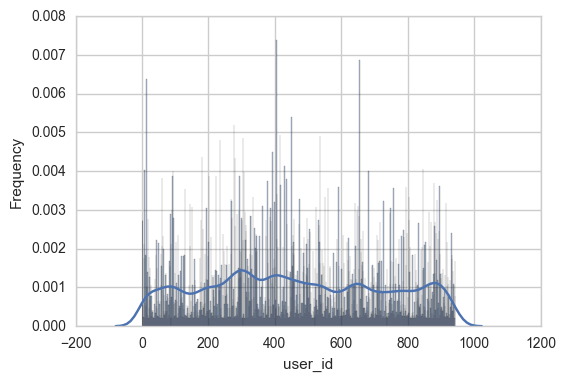

In [79]:
dist = sns.distplot(u_data["user_id"], bins=len(np.unique(u_data["user_id"])))
dist.set(ylabel="Frequency")

### 可視化してみる(2)
- ratingの回数毎のユーザーの分布をプロット
    - 多くのユーザーがrating回数が100以内

[<matplotlib.text.Text at 0x11c0770f0>, <matplotlib.text.Text at 0x11bf37940>]

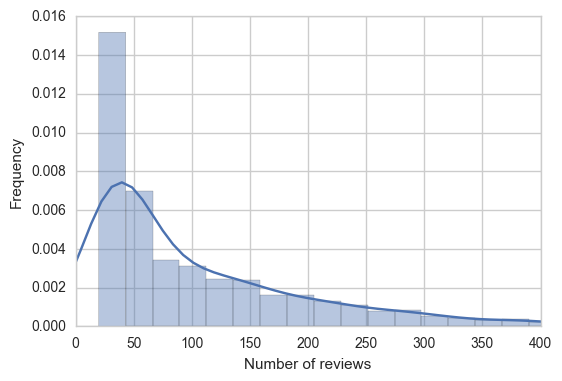

In [77]:
dist = sns.distplot(list(Counter(u_data["user_id"]).values()))
dist.set_xlim(0, 400, 40)
dist.set(xlabel="Number of reviews", ylabel="Frequency")
# sns.plt.title("rating回数におけるユーザーの分布")

### スパースなデータにしてみる
 - 推薦系のタスクで, よく出てくる表1を作るとスパースになるはず
 - 各値は, あるユーザーの, ある映画に対するrating値を示す
 - ![img](https://gyazo.com/61c78871776db5c79ab5f3778103336b.png)
 - 以下のコードでは, 表2を作ってから転置して表1にする (便宜上)
  - ![img](https://gyazo.com/2d73ffb917b23d6616a217b814f8bd7e.png)

In [170]:
table2 = DataFrame() # 表2の雛形
user_id_set = np.sort(np.unique(u_data["user_id"]))
unique_movie_num = len(np.unique(u_data["movie_id"])) # 映画の種類数
for user_id in user_id_set:
    user_rating = u_data[u_data["user_id"]==user_id]
    movie_id = np.array(user_rating["movie_id"])
    rating_list = np.zeros(unique_movie_num, dtype=int)
    rating_list[movie_id-1] = user_rating["rating"] # movie_idは1スタートなので-1して配列にアクセス
    table2[user_id]=rating_list
table2.index = range(1,unique_movie_num+1) # movie_idとuser_idは1スタートなので, indexを着け直す
table1 = table2.T
table1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5,3,4,3,3,5,4,1,5,3,2,5,5,5,5,5,3,4,5,4,1,4,4,3,4,3,2,4,1,3,3,5,4,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,0,0,4,4,0,0,0,0,3,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,4,3,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,2,4,4,0,0,4,2,5,3,0,0,0,4,0,3,3,4,0,0,0,0,2,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,5,0,0,5,5,5,4,3,5,0,0,0,0,0,0,0,0,0,5,3,0,3,0,4,5,3,0,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,4,0,0,4,0,0,4,0,4,0,4,5,3,0,0,4,0,0,0,0,0,5,5,0,0,0,0,0,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
